In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

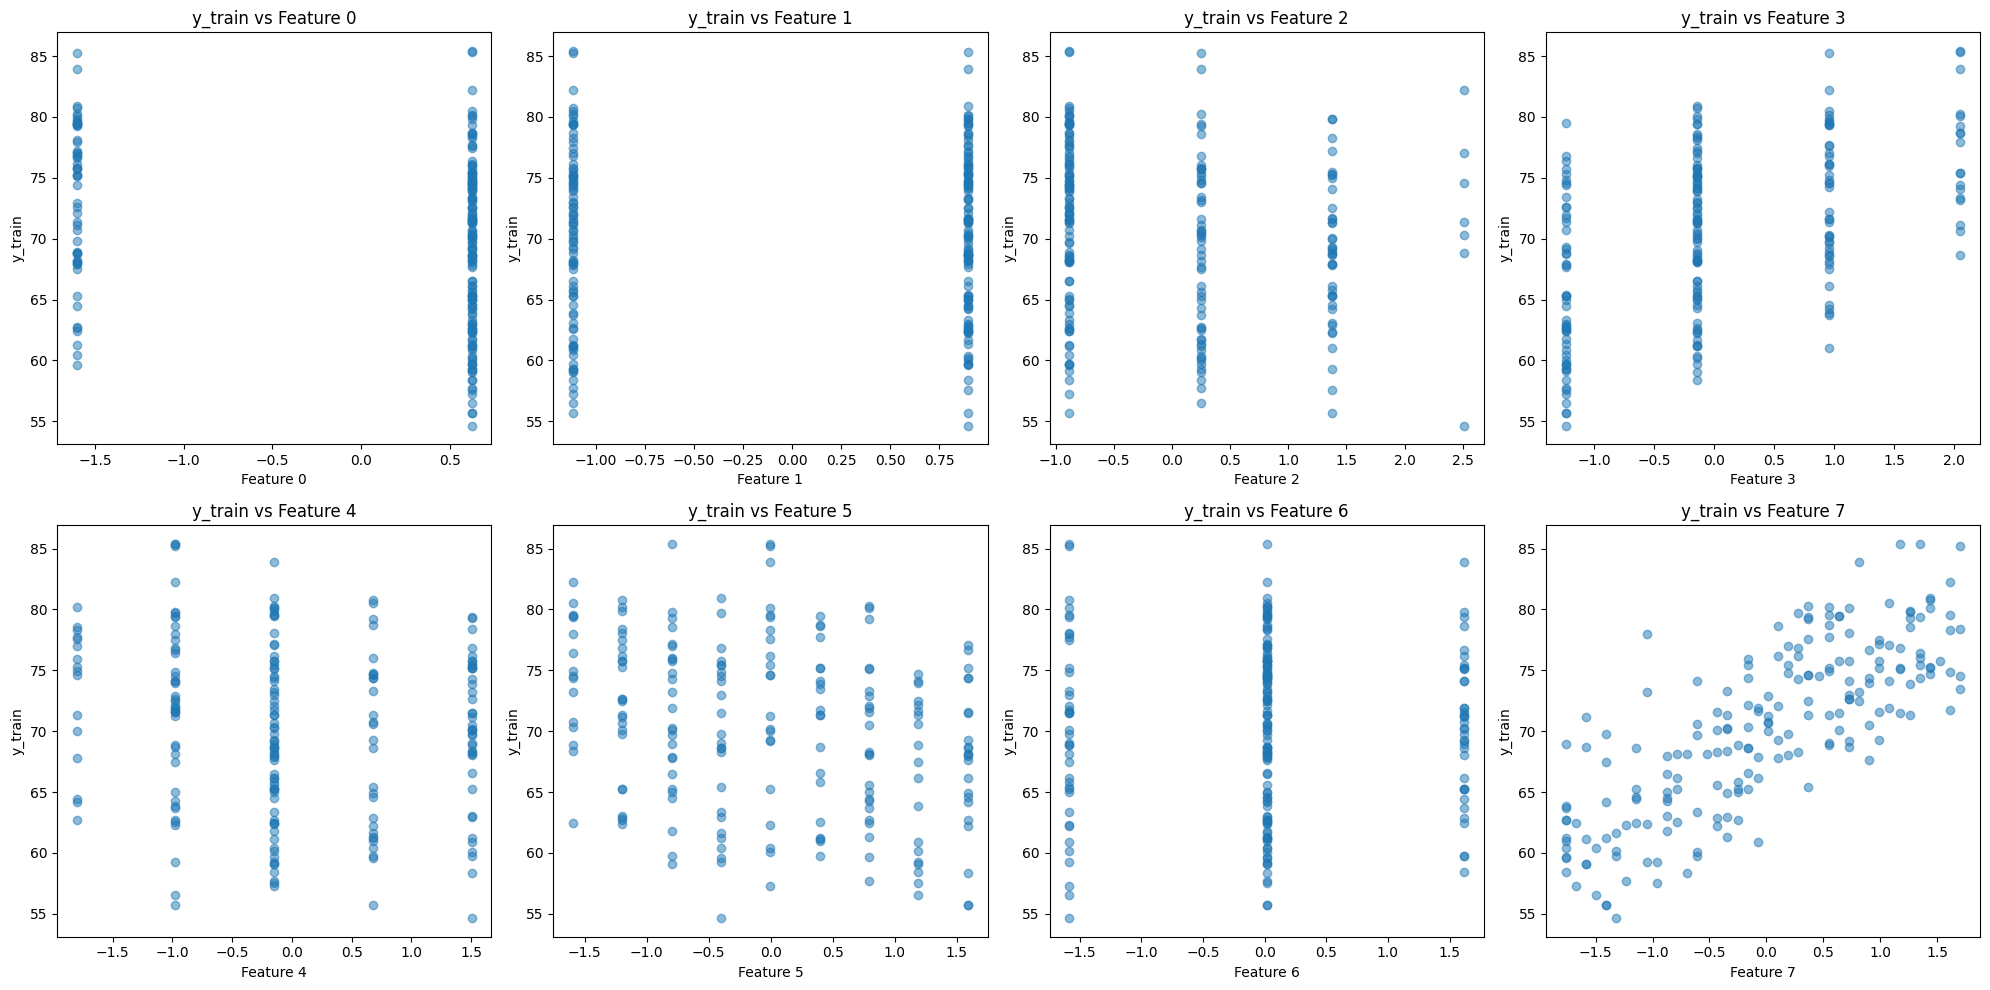

In [131]:
# Determine the number of features
num_features = x_train.shape[1]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plot y_train against each feature
for i in range(num_features):
    axes[i].scatter(x_train[:, i], y_train, alpha=0.5)
    axes[i].set_xlabel(f'Feature {i}')
    axes[i].set_ylabel('y_train')
    axes[i].set_title(f'y_train vs Feature {i}')


plt.tight_layout()
plt.show()

In [132]:
data = pd.read_excel(r"c:\Users\Yash Kakade\Desktop\pandas\linregress_assignment\Test data.xlsx")
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)
#print(x_train.shape[1])
#print(y_train)

In [133]:
def feature_changing(x_train):
    le = LabelEncoder()
    for i in range(x_train.shape[1]):
        if x_train[:,i].dtype == object:
            x_train[:,i] = le.fit_transform(x_train[:,i])
    return x_train
x_train = feature_changing(x_train)


In [134]:
def z_score(x_train):
    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    x_train = (x_train - x_mean)/x_std
    return x_train, x_std, x_mean

x_train = x_train.astype(np.float64)
x_train , x_std, x_mean = z_score(x_train)

In [135]:
np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

In [136]:
# cost fn
def cost(x_train,y_train,w,b):
    m = x_train.shape[0]
    predictions = np.dot(x_train,w)+b
    loss = (1/2*m)*np.sum((predictions-y_train)**2)
    return loss

In [137]:
def gradient_descent(x_train, y_train, w, b, learning_rate = 0.0001, iterations = 1000):
    m = x_train.shape[0]
    for i  in range(iterations):
        predictions = np.dot(x_train,w)+b
        dw = (1/m)*np.dot(x_train.T,(predictions - y_train))
        db = (1/m)*np.sum(predictions - y_train)
        w = w - learning_rate*dw
        b = b - learning_rate*db
    return w,b


In [138]:
old_cost = float('inf')

while True:
    current_cost = cost(x_train,y_train,w,b)
    if abs(old_cost - current_cost) <0.0001:
        break
    old_cost = current_cost
    w,b = gradient_descent(x_train,y_train,w,b)
x_predict = pd.read_excel(r'c:\Users\Yash Kakade\Desktop\pandas\linregress_assignment\Test data.xlsx').iloc[:,0:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict-x_mean)/x_std
ans = pd.read_excel(r'c:\Users\Yash Kakade\Desktop\pandas\linregress_assignment\Test data.xlsx').iloc[:,8].to_numpy()
# predict and evaluate
y_predict = np.dot(x_predict,w)+b

accuracy = 0
for dim in range(len(ans)):
    if abs(y_predict[dim]-ans[dim])<0.5:
        accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy > 95 else 'optimization required' 
print(f"{ok}, your accuracy is {accuracy}%")


Congratulations, your accuracy is 100.0%
